# Deskripsi library yang digunakan

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Memanggil Dataset

In [4]:
df = pd.read_csv('bmw.csv')

# Deskripsi Dataset

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


# Jumlah mobil berdasarkan model

In [8]:
df = pd.read_csv('bmw.csv')
models = df.groupby('model', as_index=False).count()[['model', 'tax']]
models = models.rename(columns={'tax':'numberOfCars'})
models = models.sort_values(by='numberOfCars', ascending=True).reset_index(drop=True)

        model  numberOfCars
0          Z3             7
1          M6             8
2          i8            17
3          M2            21
4          M3            27
5          M5            29
6    8 Series            39
7          i3            43
8          X7            55
9    7 Series           106
10         X6           106
11         Z4           108
12   6 Series           108
13         M4           125
14         X4           179
15         X2           288
16         X5           468
17         X3           551
18         X1           804
19   4 Series           995
20   5 Series          1056
21   2 Series          1229
22   1 Series          1969
23   3 Series          2443


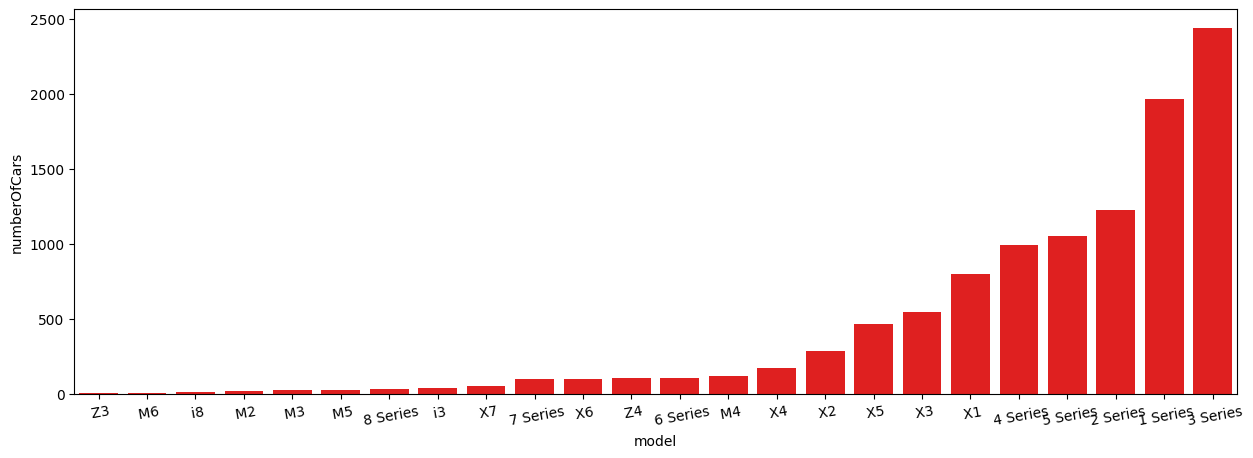

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='red')
plt.xticks(rotation=10)
print(models)

# Ukuran mesin

In [20]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

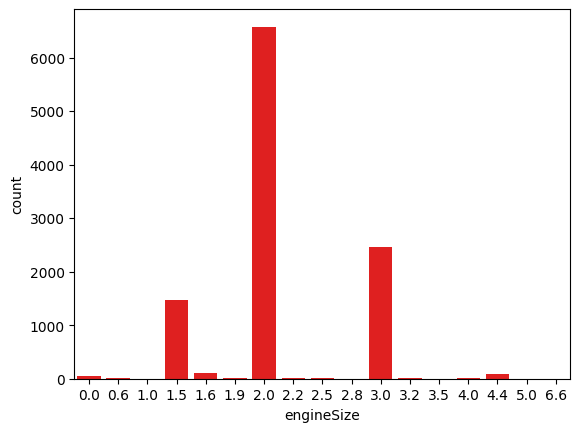

In [21]:
plt.Figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='red')

# Distribusi mileage

<Figure size 1500x500 with 0 Axes>

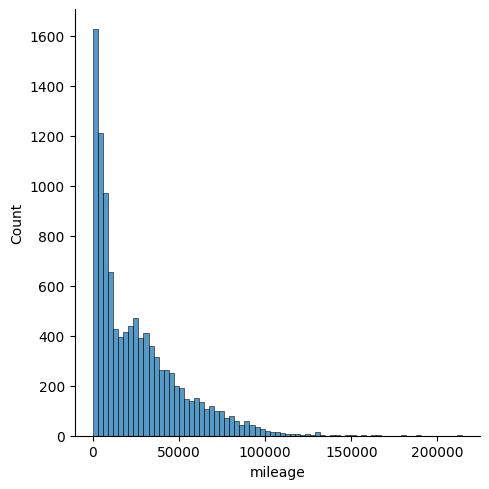

In [22]:
plt.figure(figsize=(15,5))
sns.displot(df['mileage'])

# Distribusi harga mobil

C:\Users\HP Elitebook 840 G6\AppData\Local\Temp\ipykernel_15400\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

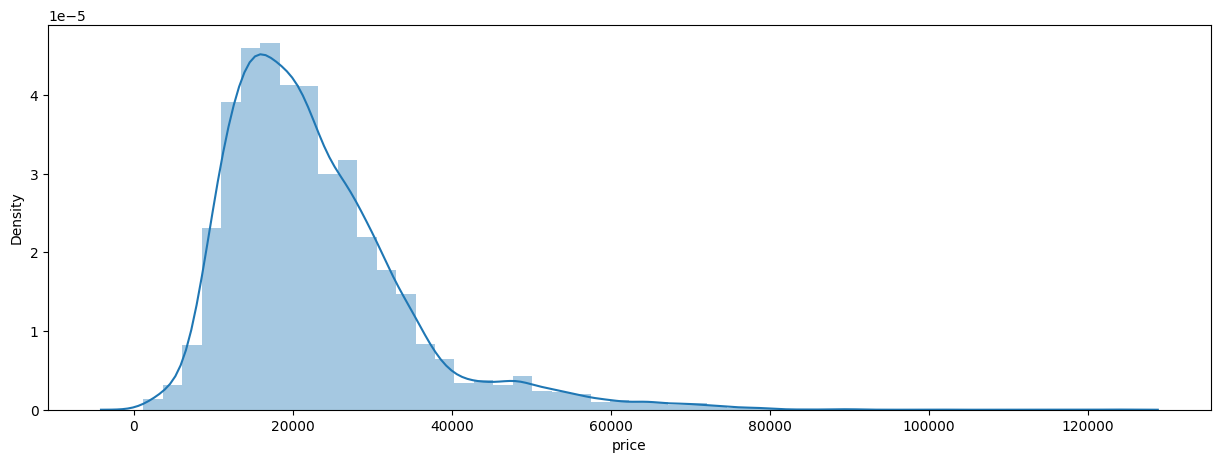

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# Seleksi Fitur

In [14]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((10781, 5), (10781,))

# split data training dan data testing

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(2696,)

# Membuat model regresi linier

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [17]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =',score)

akurasi model regresi linier = 0.6560888451480937


# Membuat inputan model regresi

In [18]:
#year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi Harga Mobil dalam EUR :', prediction)

Estimasi Harga Mobil dalam EUR : [26969.70126876]


c:\Users\HP Elitebook 840 G6\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save model

In [19]:
import pickle

filename = 'bmw.sav'
pickle.dump(lr,open(filename,'wb'))